|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif"> |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|


# Chapitre 17

In [1]:
from CoolProp.CoolProp import PropsSI
import thermo as th
# fonction Dab équation 17.2-1, utile aussi pour extrapoler
def Dab(A,B,p,T,MA,MB,polaire): #  cm2/sec
    a=[2.745e-4,3.64e-4]
    b=[1.823,2.334]
    TcA=PropsSI('Tcrit',A)
    PcA=PropsSI('Pcrit',A)/101325  # en atmosphères 
    TcB=PropsSI('Tcrit',B)
    PcB=PropsSI('Pcrit',B)/101325
    f1=(PcA*PcB)**(1/3)
    f2=(TcA*TcB)**(5/12)
    f3=(1/MA+1/MB)**(1/2)
    f=f1*f2*f3
    if polaire:
        return f*a[1]*(T/(TcA*TcB)**0.5)**b[1]/p   # polaire
    else:
        return f*a[0]*(T/(TcA*TcB)**0.5)**b[0]/p   # non-polaire
# fin de la fonction Dab
Dab('CO','CO2',1,296.1,28.01,44.01,polaire=False) # exemple 17.2-1, en cm2/sec

0.1517419935491598

### Voyons si on peut utiliser la même équation pour résoudre l'exemple 17.2-2

In [2]:
P=171.7
T=373
R=82.0578
c=P/(R*T)
cdab=c*Dab('CO2','CO2',P,T,44.01,46.01,polaire=False) # exemple 17.2-2 isotope C14 pour le CO2
print(cdab,' Le résultat est près de la valeur expérimentale de 5.89e-6')

5.609988881945637e-06  Le résultat est près de la valeur expérimentale de 5.89e-6


### Voyons si on peut utiliser la même équation pour résoudre l'exemple 17.2-3

In [3]:
R=82.0578
P=136
T=313
c=P/(R*T)
cdab=c*Dab('CH4','ethane',P,T,16.04,30.07,polaire=False) # exemple 17.2-3
print(cdab,' résultat pas mal encore, environ 10% en erreur')

6.663373783520741e-06  résultat pas mal encore, environ 10% en erreur


### En conclusion on voit que l'équation 17.2-1 semble convenir à l'évaluation du coefficient de diffusion binaire à moins de 10%, basé sur ces trois exemples de la section 17.2. 

### L'exemple 17.3-1 montre bien que le résultat calculé avec 17-2.1 est tout-à-fait satisfaisant, on n'aura donc pas à utiliser les équations de la section 17.3

# ***

## Section 17.4 diffusion en phase liquide

> ### L'équation empirique de Wilke et Chang est encore la méthode proposée pour les petites et moyennes molécules.
>> #### ####  $D_{AB}=7.4 \times 10^{-8} T \frac {\sqrt{\phi_B M_B}} {\mu \tilde {V_A}^{0.6}}$ (équation 17.4-8)

le terme $V_A$ est au point d'ebullition de la substance diffusant dans le solvant

In [4]:
import thermo as th
T=273.15+15
P=101325
phib=1
benzene=th.Chemical('benzene',T,P)
TNT=th.Chemical('118-96-7',T,P)
TNT.calculate(TNT.Tb) # on veut calculer la densité au point d'ébullition
VA=TNT.MW/(TNT.rhol/1000) # en g-moles!!!   ceci devrait être Ok
#VA=140                      # cette valeur de 140 semble etre la densité à 25 degrés C
mu=benzene.mul*1e3          # en centipoises   
MB=benzene.MW
Da= lambda T: 7.4e-8*T*(phib*MB)**0.5/(mu*VA**0.6)  # attention Va est au point d'ebullition
VA,Da(T)

(219.25241425268013, 1.0644668694655854e-05)

In [5]:
#
# Diffusion de l'oxygène dans l'eau, la valeur mesurée est 2.1e-5 cm2/sec
#
T=298
P=101325
eau=th.Chemical('water',T,P)
oxygene=th.Chemical('O2',T,P)
phib=2.26
#
oxygene.calculate(oxygene.Tb)
VA=oxygene.MW/(oxygene.rhol/1000)     # ramener aux unités g-moles !!!
#VA=25.6            # trouvée dans la littérature
mu=eau.mul*1e3
MB=eau.MW
print('Coefficient de diffusion par Wilke et Chang pour oxygene-eau ',Da(T), 'cm2/sec')

Coefficient de diffusion par Wilke et Chang pour oxygene-eau  2.132707592624732e-05 cm2/sec


In [6]:
#
# exercice 17A10 a
#
T=273+12.5
P=101325
eau=th.Chemical('water',T,P)
ac=th.Chemical('acetic acid',T,P)
phib=2.26
ac.calculate(ac.Tb) # recalcule les propriétés à Tb pour trouver la densité voulue
VA=ac.MW/(ac.rhol/1000) 
mu=eau.mul*1e3
MB=eau.MW
print('Wilke et Chang pour acide acetique-eau ',Da(T), 'cm2/sec')
print(ac.rhol/1000)
#
#b
#
T=273+15
P=101325
eau.calculate(T)
me=th.Chemical('methanol',T,P)
me.calculate(me.Tb)
VA-me.MW/(me.rhol/1000)
mu=eau.mul*1e3
print('Wilke et Chang pour acide methanol-eau a 15 ',Da(T), 'cm2/sec')
T=273+100
eau.calculate(T)
mu=eau.mul*1e3
print('Wilke et Chang pour acide methanol-eau a 100 ',Da(T), 'cm2/sec')

Wilke et Chang pour acide acetique-eau  9.102665934383858e-06 cm2/sec
0.9393154185433927
Wilke et Chang pour acide methanol-eau a 15  9.8257478185632e-06 cm2/sec
Wilke et Chang pour acide methanol-eau a 100  5.153435554932639e-05 cm2/sec


## Section 17.5: Diffusion de particules colloidales dans un liquide:
> #### Équation de Stokes-Einstein: $D_{A}=\frac {kT}{f}$ avec $f={6 \pi \mu R_A}$(équation 17.5-4)
> #### si la particule n'est pas une sphère, ce qui arrive souvent... on utilise le concept de sphère équivalente en calculant le rayon de la sphère ayant le même volume que la particule colloidale. 
>> $
\begin{array}{cc}
\mathrm{Forme\mathbf{}} & \mathrm{Coefficient\,\, de\,\, friction\mathbf{{\displaystyle }}}\\
\mathrm{Sphere} & f=6\pi\mu R\\
\mathrm{Ellipsoide\, prolate\, p=a/b>1} & f=\frac{6\pi\mu Lb(p^{2}-1)^{1/2}}{p^{1/3}ln(p+(p^{2}-1)^{1/2})}\\
\mathrm{Ellipsoide\, oblate\, p=a/b<1} & f=\frac{6\pi\mu Lb(1-p^{2})^{1/2}}{p^{1/3}tan^{-1}(p+(1-p^{2})^{1/2}p^{-1})}\\
\mathrm{Disque\, plat\, mince\, de\, rayon\, a} & f=16\mu a\\
\mathrm{Cylindre\, de\, rayon\, a\, et\, longueur\, L} &  f=\frac{4\pi L}{ln(L/a)+0.193}
\end{array}
$

In [7]:
#
# Équation de Stokes-Einstein
#
import math
Db= lambda T: (k*T)/(6*math.pi*muB*RA)   # utilisons des valeurs en SI
k=1.38e-23
RA=1.59e-9             # rayon équivalent pour un lysozyme ()
T=273.15+20
eau.calculate(T,101325)
muB=eau.mul
print('Lysozyme ',Db(T),' m2/sec, valeur mesurée 1.13 e-10')
RA=4.7e-9              # hemoglobine
print('Hémoglobine ',Db(T),' m2/sec, valeur mesurée 5.2 e-11')
# voir Adams and Fatt, Respiration  Physiology (1967) 2, 293-301; 

Lysozyme  1.3476530359594026e-10  m2/sec, valeur mesurée 1.13 e-10
Hémoglobine  4.559081547181809e-11  m2/sec, valeur mesurée 5.2 e-11


## Sections 17.7 et 17.8

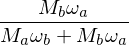

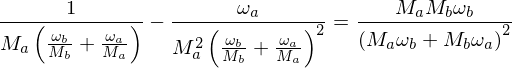

In [8]:
from IPython.display import *
import sympy as sp
sp.init_printing(use_latex=True)
x_a,x_b,omega_a,omega_b,M_a,M_b=sp.symbols('x_a x_b omega_a omega_b M_a M_b')
x_a=omega_a/M_a/(omega_a/M_a+omega_b/M_b)
display(x_a.simplify())
eq=sp.Eq(sp.diff(x_a,omega_a),sp.diff(x_a,omega_a).simplify())
display(eq)

<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/figure.png'>